In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',
                index_col=0,header=0)
df.head(60)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m


In [3]:
df1 = df.fillna(df.mean())
df1.head(60)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m


In [4]:
y = np.unique(df1['Genotype'].values,return_inverse=True)[1]

In [5]:
X = np.array(df1.iloc[:,0:77])
Xs = preprocessing.scale(X)

In [6]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.985185


<Container object of 3 artists>

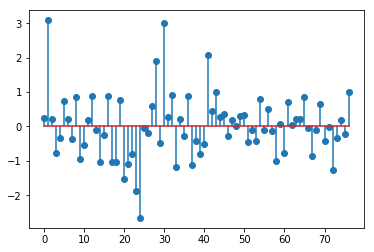

In [8]:
W = logreg.coef_.reshape((logreg.coef_.shape[1]))
plt.stem(W)

In [9]:
W_max = np.argsort(-abs(W))[:2]
Gene_max = np.array(df1.columns[W_max])
print("Two genes with largest magnitude of W are %s and %s." %(Gene_max[0],Gene_max[1]))

Two genes with largest magnitude of W are ITSN1_N and APP_N.


In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
prec = []
rec = []
f1 = []
err = []
for isplit, Ind in enumerate(kf.split(Xs)):
    Itr, Its = Ind
    Xtr = Xs[Itr]
    ytr = y[Itr]
    Xts = Xs[Its]
    yts = y[Its]
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    erri = np.mean(yhat != yts)
    err.append(erri)
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
errm= np.mean(err)
print('Precision =  {0:.4f}'.format(precm))
print('Recall =     {0:.4f}'.format(recm))
print('f1 =         {0:.4f}'.format(f1m))
print('Error rate =  {0:.4f}'.format(errm))

Precision =  0.9742
Recall =     0.9629
f1 =         0.9682
Error rate =  0.0296


In [11]:
y = np.unique(df1['class'].values,return_inverse=True)[1]

In [12]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.999074


In [14]:
from sklearn.metrics import confusion_matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err = []
cm = np.zeros([8,8])
for isplit, Ind in enumerate(kf.split(Xs)):
    Itr, Its = Ind
    Xtr = Xs[Itr]
    ytr = y[Itr]
    Xts = Xs[Its]
    yts = y[Its]
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    cm += confusion_matrix(yts,yhat)
    erri = np.mean(yhat != yts)
    err.append(erri)
C = cm.astype('float')/cm.sum(axis=1)
print(np.array_str(C, precision=4, suppress_small=True))
errm = np.mean(err)
err_se = np.std(err)/np.sqrt(nfold-1)
print('Error rate={0:.4f}, SE={1:.4f}'.format(errm,err_se))

[[ 0.9667  0.0074  0.0067  0.      0.0222  0.      0.      0.    ]
 [ 0.0067  0.9852  0.      0.      0.0074  0.      0.      0.    ]
 [ 0.      0.      0.9933  0.      0.      0.      0.      0.0074]
 [ 0.0133  0.      0.      0.9852  0.      0.      0.      0.    ]
 [ 0.0067  0.0148  0.      0.      0.9778  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.    ]]
Error rate=0.0120, SE=0.0031


<Container object of 3 artists>

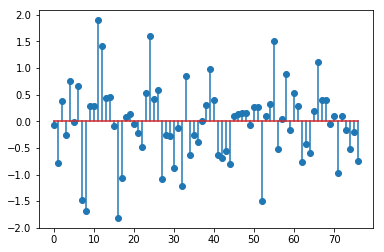

In [15]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xs, y)
W = logreg.coef_
plt.stem(W[0])

In [23]:
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
acc = np.zeros((20,nfold))
err = np.zeros((20,nfold))
d = np.logspace(-3,2,20)
for isplit, Ind in enumerate(kf.split(Xs)):
    Itr, Its = Ind
    Xtr = Xs[Itr]
    ytr = y[Itr]
    Xts = Xs[Its]
    yts = y[Its]
    for i in range(20):
        logreg = linear_model.LogisticRegression(penalty='l1', C=d[i])
        logreg.fit(Xtr, ytr)
        yhat = logreg.predict(Xts)
        acc[i,isplit] = np.mean(yhat == yts)
        err[i,isplit] = np.mean(yhat != yts)
accm = np.mean(acc,axis=1)
errm = np.mean(err,axis=1)
err_se = np.std(err,axis=1)/np.sqrt(nfold-1)

[ 0.13888889  0.13888889  0.12592593  0.12592593  0.53055556  0.71018519
  0.83703704  0.91111111  0.9537037   0.97592593  0.98333333  0.98981481
  0.99259259  0.99259259  0.99166667  0.99166667  0.99074074  0.99166667
  0.99074074  0.99166667]


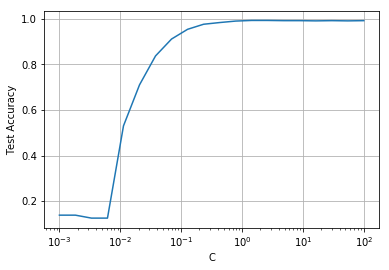

Compared to the accuracy achieved without regularization, the accuracy with L1 regularization gets lower when regularization strength increases.


In [24]:
print(accm)
plt.semilogx(d, accm)
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.grid()
plt.show()
print('Compared to the accuracy achieved without regularization, the accuracy with\
 L1 regularization gets lower when regularization strength increases.')

The optimal C is 1.4384.
The weight matrix is much more sparse.


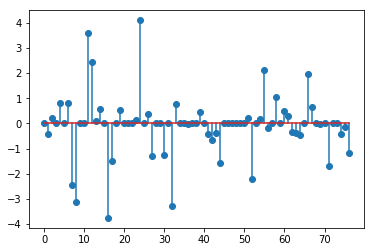

In [25]:
#Use the one standard error rule
imin = np.argmin(errm)
err_tgt = errm[imin] + err_se[imin]
I = np.where(errm < err_tgt)[0]
iopt = I[0]
c_opt = d[iopt]
print('The optimal C is {0:.4f}.'.format(c_opt))
logreg = linear_model.LogisticRegression(penalty='l1', C=c_opt)
logreg.fit(Xs, y)
W_l1 = logreg.coef_
plt.stem(W_l1[0])
print('The weight matrix is much more sparse.')